In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D 
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.callbacks import History 
from tensorflow.keras.callbacks import ModelCheckpoint


In [12]:
# Load dataset 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
 
# Preprocess data 
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255 
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255 
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels) 
original_test_labels = np.argmax(test_labels, axis=1)  
# Save original labels for confusion matrix 
# a) Co się dzieje w preprocessing? - przetwarzanie wstępne
# 1) Normalizacja danych - dzielimy wartości pikseli przez 255, aby znajdowały się w zakresie [0,1]
# 2) reshape - Zmiana kształtu, dostosowanie danych do formatu oczekiwanego przez sieć neuronową. (liczba próbek, obrazki 28x28 pikseli, kanał czarno-biały)
# 3) to_categorical - Kodowanie etykiet, one-hot, zmienia liczby na wektory z zer i jednej 1
# 4) np.argmax - Konwersja predykcji na etykiety, zamiana wektora one-hot z powrotem na numer klasy
 
# Define model 
model = Sequential([ 
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(64, activation='relu'), 
    Dense(10, activation='softmax') 
]) 
# b) Jak dane przepływają przez sieć i jak się w niej transformują?
# 1) Conv2D - Warstwa konwolucyjna
#       Otrzymuje obrazek 28×28×1.
#       Stosuje 32 filtry o rozmiarze 3×3.
#       Każdy filtr wykrywa różne cechy (np. krawędzie).
#       Na wyjściu: macierz cech 26×26×32.
# 2) Warstwa MaxPooling2D(2,2)
#       Zmniejsza rozmiar mapy cech do 13×13×32.
#       Redukuje liczbę parametrów i przyspiesza obliczenia.
# 3) Warstwa spłaszczająca (Flatten)
#       Zamienia trójwymiarową macierz (13×13×32) na jednowymiarowy wektor (5408).
# 4) Warstwa gęsta (Dense(64, activation='relu'))
#       Ma 64 neurony, każdy łączy się z wszystkimi wejściami.
#       ReLU pozwala modelowi uczyć się nieliniowych zależności.
# 5) Warstwa wyjściowa (Dense(10, activation='softmax'))
#       Produkuje 10 wartości reprezentujących prawdopodobieństwo dla każdej cyfry (0-9).
#       Softmax zapewnia, że wartości sumują się do 1.
 
# Compile model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
 
# Train model 
# Tworzymy obiekt do śledzenia historii
history = History() 
# Tworzymy callback do zapisu najlepszego modelu
checkpoint = ModelCheckpoint(
    "best_model.h5",  # Plik do zapisu
    monitor="val_accuracy",  # Śledzimy dokładność walidacyjną
    save_best_only=True,  # Zapisujemy tylko lepszy model
    mode="max",  # Chcemy maksymalizować dokładność
    verbose=1
)

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2, callbacks=[history, checkpoint])

Epoch 1/5


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8602 - loss: 0.4790
Epoch 1: val_accuracy improved from -inf to 0.96942, saving model to best_model.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8609 - loss: 0.4769 - val_accuracy: 0.9694 - val_loss: 0.1108
Epoch 2/5
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9750 - loss: 0.0872
Epoch 2: val_accuracy improved from 0.96942 to 0.97608, saving model to best_model.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9751 - loss: 0.0872 - val_accuracy: 0.9761 - val_loss: 0.0780
Epoch 3/5
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9832 - loss: 0.0567
Epoch 3: val_accuracy improved from 0.97608 to 0.98167, saving model to best_model.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9832 - loss: 0.0567 - val_accuracy: 0.9817 - val_loss: 0.0631
Epoch 4/5
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9876 - loss: 0.0414
Epoch 4: val_accuracy improved from 0.98167 to 0.98375, saving model to best_model.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9837 - val_loss: 0.0571
Epoch 5/5
745/750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9910 - loss: 0.0295
Epoch 5: val_accuracy did not improve from 0.98375
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9910 - loss: 0.0296 - val_accuracy: 0.9825 - val_loss: 0.0606


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0625
Test accuracy: 0.9834
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


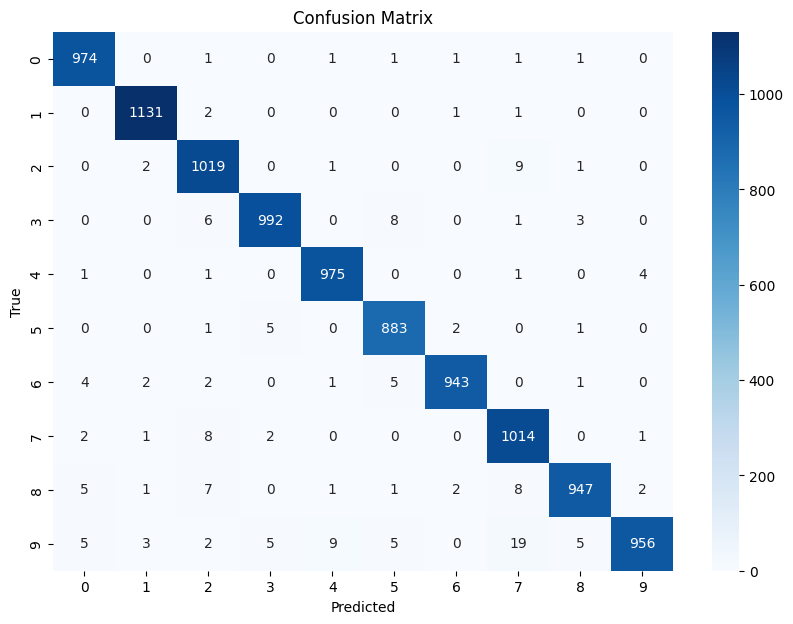

In [13]:
# Evaluate on test set 
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc:.4f}") 
 
# Predict on test images 
predictions = model.predict(test_images) 
predicted_labels = np.argmax(predictions, axis=1) 
 
# Confusion matrix 
cm = confusion_matrix(original_test_labels, predicted_labels) 
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix') 
plt.show()  

# c) Jakich błędów na macierzy błędów jest najwięcej. Które cyfry są często mylone z jakimi innymi? 
# 2 - 7
# 9 - 7
# 3 - 5


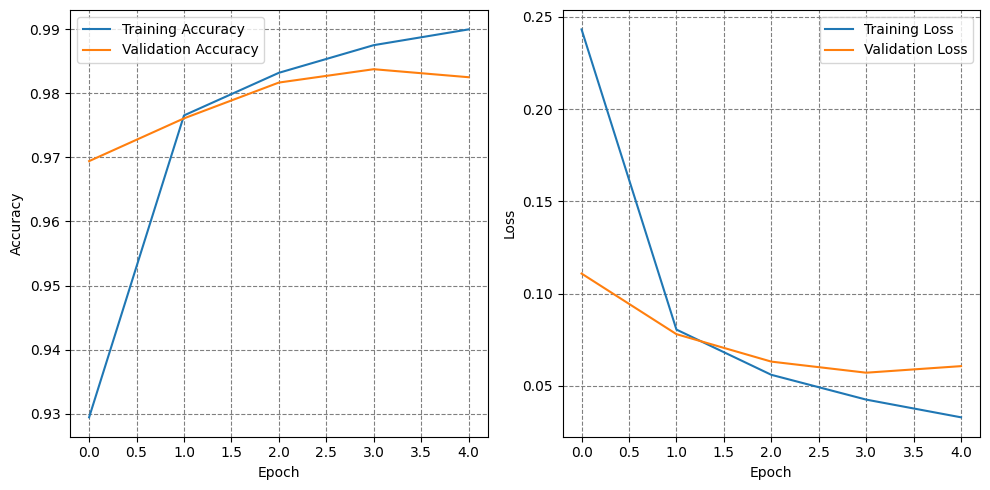

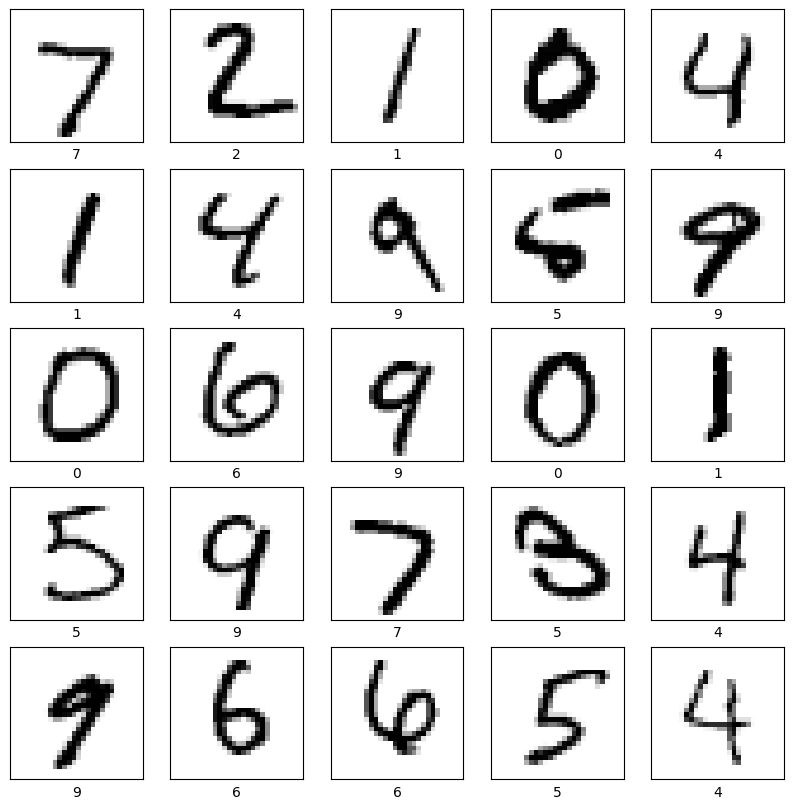

In [14]:
# Plotting training and validation accuracy 
plt.figure(figsize=(10, 5)) 
plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.grid(True, linestyle='--', color='grey') 
plt.legend() 
 
# Plotting training and validation loss 
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.grid(True, linestyle='--', color='grey') 
plt.legend() 
 
plt.tight_layout() 
plt.show() 
# d) Co możesz powiedzieć o krzywych uczenia się. Czy mamy przypadek przeuczenia lub niedouczenia się?
# dobrze dopasowany model
 
# Display 25 images from the test set with their predicted labels 
plt.figure(figsize=(10,10)) 
for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary) 
    plt.xlabel(predicted_labels[i]) 
plt.show()

In [15]:

# e) Jak zmodyfikować kod programu, aby model sieci był zapisywany do pliku h5 co epokę, pod warunkiem, że w tej 
# epoce osiągnęliśmy lepszy wynik?  